<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

Connect to the database.


In [4]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [2]:
import pandas as pd

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [ ]:
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""

## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

In [ ]:
#all columns and row are loaded into df_
df_ = pd.read_sql_query("SELECT * FROM master", conn)


In [37]:
# Execute a query to check the data
query = "SELECT COUNT(*) FROM master"
count = pd.read_sql_query(query, conn)
print(f"Total rows in the table: {count.iloc[0, 0]}")

ProgrammingError: Cannot operate on a closed database.

In [ ]:
df_.head()

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df_["ConvertedComp"], bins=30, edgecolor='black')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Compensation')
plt.grid(True)
plt.show()

### Box Plots


Plot a box plot of `Age.`


In [ ]:
# your code goes here
bin_edges = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_['Age'], bins=bin_edges, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age with Custom Bins')
plt.xticks(bin_edges)  # Set x-ticks to match bin edges
plt.grid(True)
plt.savefig('converted_comp_histogram.png')
plt.show()
plt.close()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [ ]:
import seaborn as sns

In [ ]:
"""
Plot scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='WorkWeekHrs', data=df_, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.grid(True)
plt.show()
"""

In [ ]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.scatter(df_['Age'], df_['WorkWeekHrs'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age vs WorkWeekHrs')
# Set custom x-ticks
#x_ticks = range(int(df_clean['Age'].min()), int(df_clean['Age'].max()) + 1, 5): This creates a range of x-ticks 
#starting from the minimum age value up to the maximum age value, 
#with a step of 5. Adjust the step value as needed.
x_ticks = range(int(df_['Age'].min()), int(df_['Age'].max()) + 1, 5)  # Customize the range and step
plt.xticks(ticks=x_ticks, labels=[str(i) for i in x_ticks])
plt.grid(True)
plt.show()

In [ ]:
# Create the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='WorkWeekHrs', data=df_, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.title('Scatter Plot of Age vs WorkWeekHrs with Regression Line')
plt.grid(True)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [ ]:

# your code goes here
plt.figure(figsize=(12, 8))
sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', data=df_, legend=None, alpha=0.7, sizes=(50, 500))
plt.xlabel('WorkWeekHrs (log scale)')
plt.ylabel('CodeRevHrs')
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs with Age as Bubble Size')
plt.grid(True)
plt.show()


## Visualizing composition of data


### Pie Charts

Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [43]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(LanguageDesireNextYear) as count
FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by count desc
LIMIT 5
"""
df_language_desired=pd.read_sql_query(QUERY,conn)


In [44]:
df_language_desired.head(1)

,LanguageDesireNextYear,count
0,JavaScript,6630


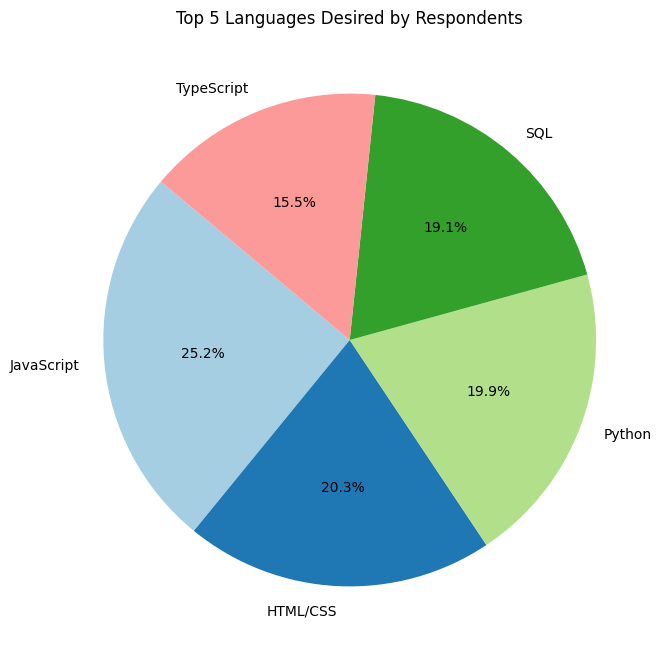

In [45]:
# Extract the data
labels = df_language_desired['LanguageDesireNextYear']
sizes = df_language_desired['count']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels))))
plt.title('Top 5 Languages Desired by Respondents')
plt.show()

In [ ]:
#Question 1
#In the pie chart of top 5 databases, respondents wish to learn next year, what is the percentage of =?

In [ ]:
conn.close()

In [3]:
import pandas as pd


In [46]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [5]:

query = """
SELECT DatabaseDesireNextYear, COUNT(DatabaseDesireNextYear) AS count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
LIMIT 5
"""
df_dabase = pd.read_sql_query(query,conn)

In [6]:
df_dabase.head()

,DatabaseDesireNextYear,count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


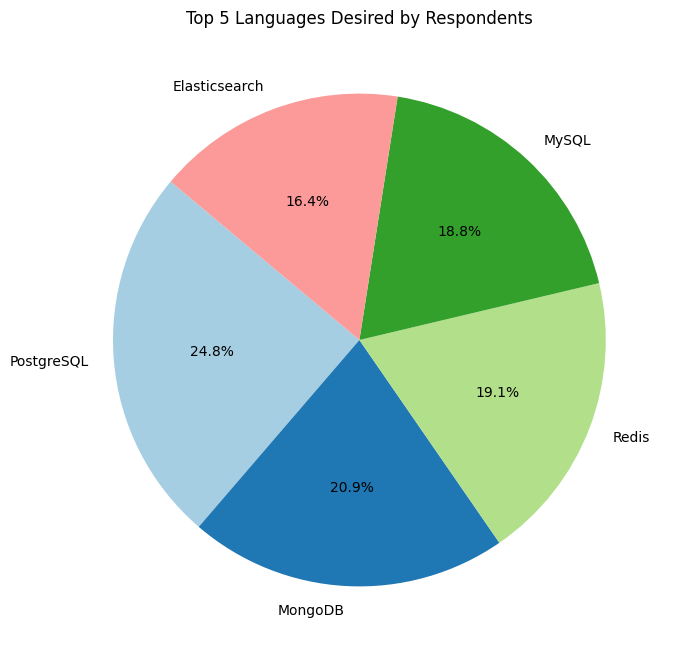

In [9]:
# Extract the data
labels = df_dabase['DatabaseDesireNextYear']
sizes = df_dabase['count']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels))))
plt.title('Top 5 Languages Desired by Respondents')
plt.show()

In [111]:
conn.close()

In [108]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

#Question 3
#How many respondents indicated that they currently work with 'SQL'? 

In [109]:

QUERY = """
select count(distinct respondent) as number_of_respondents
from LanguageWorkedWith
where lower(LanguageWorkedWith) = 'sql';
"""
df_work_sql = pd.read_sql_query(QUERY,conn)


In [110]:
df_work_sql

,number_of_respondents
0,7106


In [105]:
QUERY = """
SELECT COUNT(*) AS number_of_respondents
FROM (
    SELECT respondent
    FROM DatabaseWorkedWith
    GROUP BY respondent
    HAVING SUM(CASE WHEN lower(DatabaseWorkedWith) = 'mysql' THEN 1 ELSE 0 END) > 0
       AND COUNT(DISTINCT lower(DatabaseWorkedWith)) = 1
) AS exclus
"""
dss=pd.read_sql_query(QUERY,conn)

In [106]:
dss

,number_of_respondents
0,474


In [102]:
QUERY = """
SELECT Respondent, DatabaseWorkedWith, COUNT(DatabaseWorkedWith) as count
FROM DatabaseWorkedWith
group by Respondent
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df[(df['DatabaseWorkedWith'] == 'MySQL') & (df['count'] == 1)]

,Respondent,DatabaseWorkedWith,count
10,25,MySQL,1
61,129,MySQL,1
67,147,MySQL,1
68,148,MySQL,1
88,194,MySQL,1
...,...,...,...
10884,25007,MySQL,1
10888,25012,MySQL,1
10919,25091,MySQL,1
10929,25111,MySQL,1


In [82]:
conn.close()

In [83]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [97]:
#Q3
#How many respondents indicated that they work on 'MySQL' only? 
Querry="""
select Respondent, DatabaseWorkedWith, COUNT(DatabaseWorkedWith) as count
from DatabaseWorkedWith
where lower(DatabaseWorkedWith) = 'mysql'
group by respondent
;

"""
df_work_mysql=pd.read_sql_query(Querry,conn)


In [99]:
df_work_mysql['DatabaseWorkedWith'].value_counts

<bound method IndexOpsMixin.value_counts of 0       MySQL
1       MySQL
2       MySQL
3       MySQL
4       MySQL
        ...  
5464    MySQL
5465    MySQL
5466    MySQL
5467    MySQL
5468    MySQL
Name: DatabaseWorkedWith, Length: 5469, dtype: object>

KeyError: 'DatabaseWorkedWith'

In [81]:
df_work_mysql.head()

,number_of_respondents
0,5469


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [11]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [14]:
df_ = pd.read_sql_query("SELECT * FROM master", conn)

In [30]:
# your code goes here
#checked already dtype made sure all WorkWeekHrs and CodeRevHrs are numeric
df_filtered_age = df_[(df_['Age'] >= 30) & (df_['Age'] <= 35)][['WorkWeekHrs', 'CodeRevHrs', 'Age']]


<Figure size 1000x600 with 0 Axes>

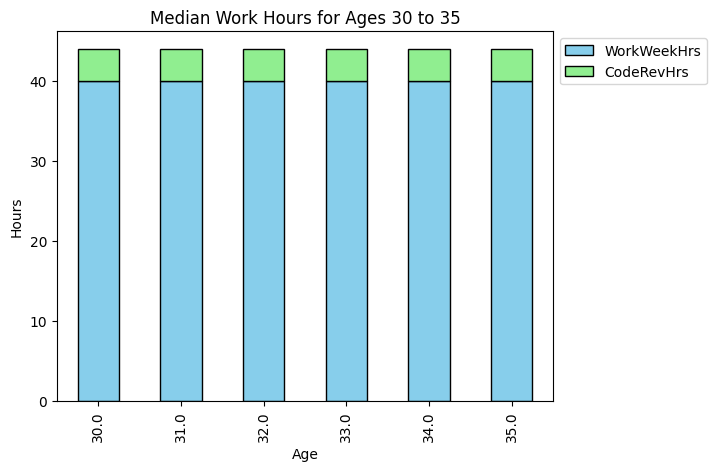

In [35]:
median_df = df_filtered_age.groupby('Age').median().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Create a stacked bar chart
median_df.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Hours')
plt.title('Median Work Hours for Ages 30 to 35')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position legend outside the plot

# Display the plot
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [36]:
conn.close()

In [38]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

In [39]:
df_ = pd.read_sql_query("SELECT * FROM master", conn)

In [40]:
# your code goes here
# Filter data for ages between 45 and 60
age_filtered_df = df_[(df_['Age'] >= 45) & (df_['Age'] <= 60)]


In [41]:
# Group by age and calculate the median ConvertedComp
median_comp_by_age = age_filtered_df.groupby('Age')['ConvertedComp'].median().reset_index()

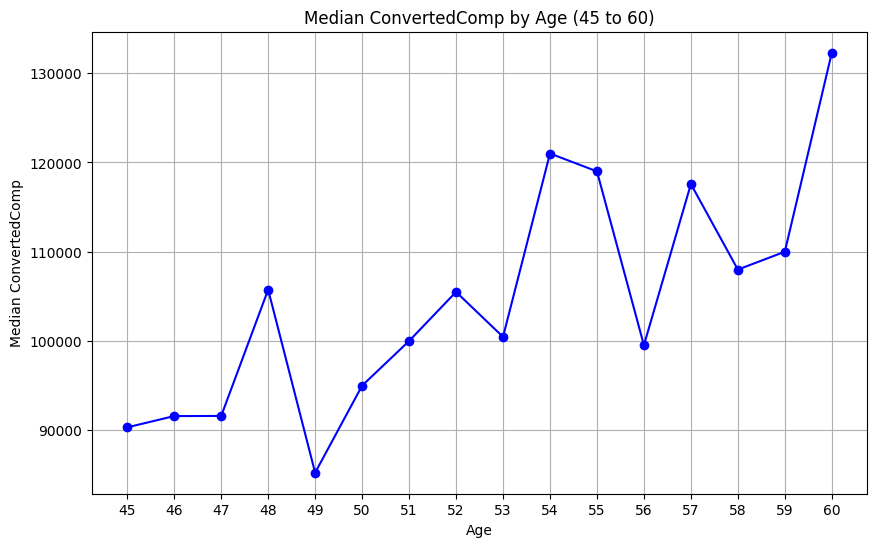

In [42]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age['Age'], median_comp_by_age['ConvertedComp'], marker='o', linestyle='-', color='b')
plt.xlabel('Age')
plt.ylabel('Median ConvertedComp')
plt.title('Median ConvertedComp by Age (45 to 60)')
plt.grid(True)
plt.xticks(range(45, 61))  # Ensure all ages from 45 to 60 are shown on the x-axis
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [ ]:
##mainbranch_counts.index provides the labels for the bars (the unique values in MainBranch).
# Count occurrences of each unique value in 'MainBranch'
mainbranch_counts = df_['MainBranch'].value_counts()
# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(mainbranch_counts.index, mainbranch_counts.values, color='skyblue')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Distribution of Main Branch')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Question 1
#Based on the boxplot of the column "Age", where do you see the outliers?

In [ ]:
age_plot=df_["Age"]

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.grid(True)
plt.show()

In [ ]:
Q1 = df_['Age'].quantile(0.25)
Q3 = df_['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

# Find outliers
outliers = df_[(df_['Age'] < lower_bound) | (df_['Age'] > upper_bound)]
print(outliers)

In [ ]:
df_.tail(10)

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
